116 Years of Data to Predict the Next 10 Years of Temperature


In [8]:

import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
DATA_DIR = '/content/tempdata.csv'
d= pd.read_csv(DATA_DIR)
df2=d[d['Hemisphere']=='Global']
df=df2[['change temp']]
df

,change temp
0,-0.156667
1,-0.071667
2,-0.096667
3,-0.161667
4,-0.276667
...,...
136,1.018333
137,0.925833
138,0.853333
139,0.985833


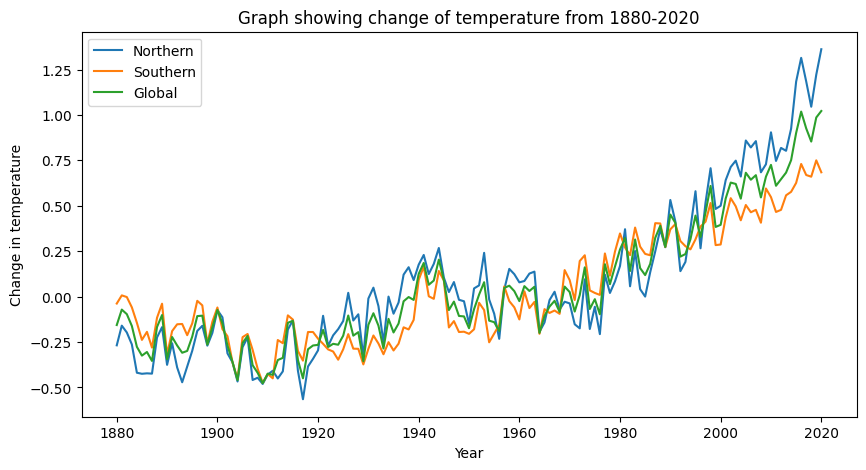

In [9]:
hemisphere_set=set(d['Hemisphere'])
plt.figure(figsize=(10, 5))
for h in hemisphere_set:
  df1=d.loc[d['Hemisphere']==h]
  x=df1['Year']
  y=df1['change temp']
  plt.plot(x,y,label=h)
plt.xlabel("Year")
plt.ylabel("Change in temperature")
plt.title("Graph showing change of temperature from 1880-2020")
plt.legend()
plt.show()

In [10]:
#spliting training data set and testing data set in a 90:100 ratio
iltrain= 0.9
split = int(len(df) * 0.9)
training_set = df[:split].values
test_set = df[split:].values

In [11]:

len(training_set)

126

In [12]:
x_train = []
y_train = []
future = 10
past = 116
for i in range(0, len(training_set) - past - future + 1):
  x_train.append(training_set[i : i + past, 0])
  y_train.append(training_set[i + past : i + past + future, 0])

In [13]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))

In [20]:

EPOCHS = 500
BATCH_SIZE = 32
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=116, return_sequences=True, input_shape = (x_train.shape[1], 1))))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 116, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 116, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 116))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = future, activation='relu'))
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
regressor.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - acc: 0.0000e+00 - loss: 0.2819
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - acc: 0.0000e+00 - loss: 0.2702
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step - acc: 0.0000e+00 - loss: 0.2626
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step - acc: 0.0000e+00 - loss: 0.2312
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 0.0000e+00 - loss: 0.2111
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step - acc: 0.0000e+00 - loss: 0.1636
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - acc: 0.0000e+00 - loss: 0.1460
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - acc: 0.0000e+00 - loss: 0.2183
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - acc: 0.0000e+00 - loss: 0.1178
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - acc: 0.0000e+00 - loss: 0.1207
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - acc: 0.0000e+00 - loss: 0.1341
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - acc: 0.0000e+00 - loss: 0.1076
Epoch

In [21]:

xtest = test_set[:past, 0]
ytest = test_set[0 :10, 0]
xtest, ytest = np.array(xtest), np.array(ytest)
xtest = np.reshape(xtest, (1, xtest.shape[0], 1))
predicted_temperature = regressor.predict(xtest)
print('Predicted temperature {}'.format(predicted_temperature))
print('Real temperature {}'.format(ytest))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
Predicted temperature [[0.41271654 0.58672047 0.7721135  0.45946565 0.49671438 0.679802
  0.76735026 0.7209999  0.64626545 0.84308624]]
Real temperature [0.64333333 0.66833333 0.54583333 0.66       0.725      0.61
 0.64583333 0.6825     0.75083333 0.90083333]


In [22]:

import pandas as pd
l = predicted_temperature.flatten()
lp = l.tolist()
lr = ytest.tolist()

df = pd.DataFrame(list(zip(lp,lr)), columns =['pred', 'real'])
df

,pred,real
0,0.412717,0.643333
1,0.586720,0.668333
2,0.772114,0.545833
3,0.459466,0.660000
4,0.496714,0.725000
5,0.679802,0.610000
6,0.767350,0.645833
7,0.721000,0.682500
8,0.646265,0.750833
9,0.843086,0.900833


Text(0.5, 1.0, 'Grouped Bar Graph for predicted and real temperature')

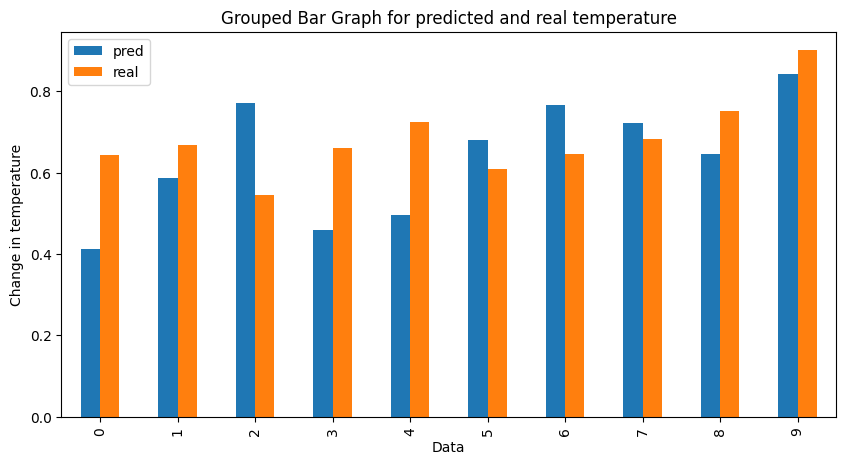

In [23]:
df.plot.bar(figsize=(10, 5))
plt.xlabel("Data")
plt.ylabel("Change in temperature")
plt.title("Grouped Bar Graph for predicted and real temperature")

Mean Squared Error (MSE): 0.023876592159315896
Root Mean Squared Error (RMSE): 0.15452052342428788
Mean Absolute Error (MAE): 0.13594635919063203
R-squared (R²): -1.9239403303349856


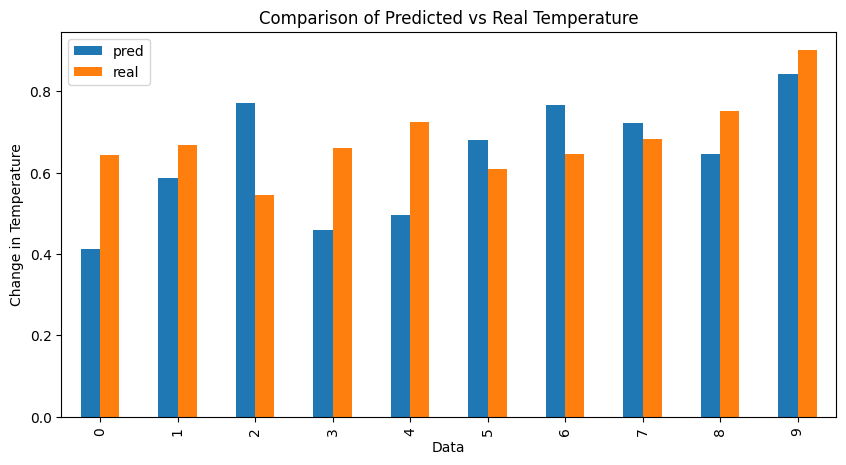

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predicted_temp = predicted_temperature.flatten()
actual_temp = ytest.flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_temp, predicted_temp)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(actual_temp, predicted_temp)  # Mean Absolute Error
r2 = r2_score(actual_temp, predicted_temp)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

metrics = {
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2
}

df_comparison = pd.DataFrame(list(zip(predicted_temp, actual_temp)), columns=['pred', 'real'])
df_comparison.plot.bar(figsize=(10, 5))
plt.xlabel("Data")
plt.ylabel("Change in Temperature")
plt.title("Comparison of Predicted vs Real Temperature")
plt.show()
